In [1]:
import os
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

In [2]:
import lsst.sims.featureScheduler as sched

In [3]:
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as mb
import lsst.sims.maf.plots as plots

In [4]:
opsdb = db.OpsimDatabaseFBS(os.path.join('db', 'baseline_v1.3_10yrs.db'))

/Users/lynnej/lsst_stack/stack/miniconda3-4.5.12-1172c30/DarwinX86/healpy/1.10.3.lsst2+3/lib/python/healpy-1.10.3-py3.7-macosx-10.7-x86_64.egg/healpy/projaxes.py:1069: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/Users/lynnej/lsst_stack/stack/miniconda3-4.5.12-1172c30/DarwinX86/healpy/1.10.3.lsst2+3/lib/python/healpy-1.10.3-py3.7-macosx-10.7-x86_64.egg/healpy/projaxes.py:1027: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):


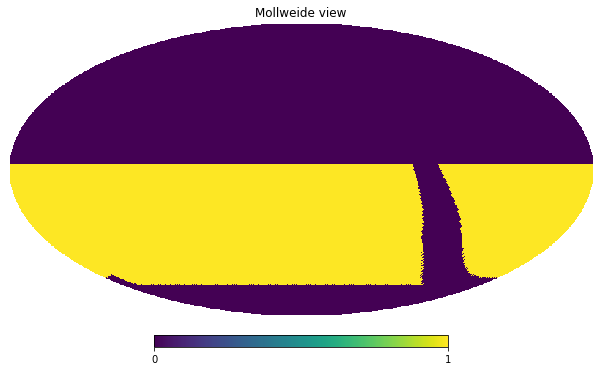

In [5]:
nside = 64
wfd = sched.utils.WFD_no_gp_healpixels(nside)
wfd_pix = np.where(wfd == 1)[0]
hp.mollview(wfd)

In [6]:
s = slicers.HealpixSubsetSlicer(nside, wfd_pix)

HealpixSubsetSlicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [7]:
simData = opsdb.fetchMetricData(['observationStartMJD', 'fieldRA', 'fieldDec', 'filter'], 
                                sqlconstraint='night < 300')

In [8]:
s.setupSlicer(simData)

In [9]:
m = metrics.CountMetric('observationStartMJD', metricName='nvisits')

In [10]:
bundle = mb.MetricBundle(m, s, constraint='night < 300')

In [11]:
g = mb.MetricBundleGroup({0: bundle}, opsdb)

In [12]:
g.setCurrent('night < 300')

In [13]:
g.runCurrent('night < 300', simData)

Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


monopole: 86.4961  dipole: lon: -172.084, lat: 2.61272, amp: 24.6362


/Users/lynnej/lsstRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 1362 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


{'SkyMap': 1, 'Histogram': 2, 'PowerSpectrum': 3}

/Users/lynnej/lsst_stack/stack/miniconda3-4.5.12-1172c30/DarwinX86/healpy/1.10.3.lsst2+3/lib/python/healpy-1.10.3-py3.7-macosx-10.7-x86_64.egg/healpy/projaxes.py:1027: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):


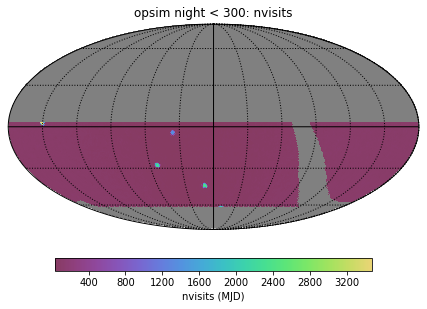

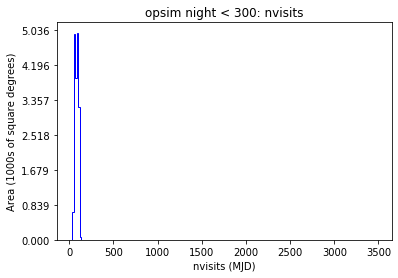

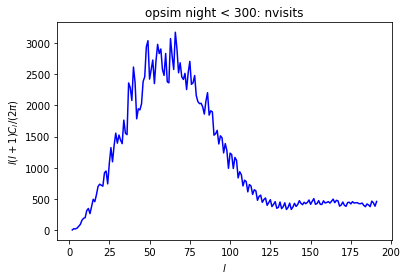

In [14]:
bundle.plot()